## SNAKE GAME USING OPENCV

1. RAW CODE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random
import time

In [6]:
img=np.zeros((500,500,3),dtype='uint8')  #making canvas to check the snake and apple postion

In [7]:
snake_pos=[[250,250],[240,250],[230,250]]
for pos in snake_pos:
    cv.rectangle(img,(pos[0],pos[1]),(pos[0]+10,pos[1]+10),(0,255,0),-1)       #loop to create a snake

In [8]:
snake_pos

[[250, 250], [240, 250], [230, 250]]

In [9]:
snake_pos[0][0]

250

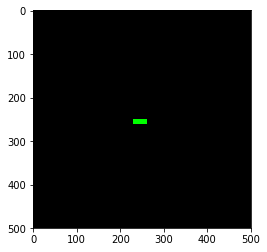

In [10]:
plt.imshow(img)

In [13]:
#creating random positions to apple 
apple_pos=[random.randrange(1,50)*10,random.randrange(1,50)*10] 

#creating apple
cv.rectangle(img,(apple_pos[0],apple_pos[1]),(apple_pos[0]+10,apple_pos[1]+10),(255,0,255),-1)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

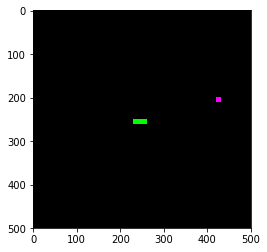

In [12]:
plt.imshow(img)

2. MAIN CODE

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random
import time

In [3]:
#function for boundary collision of snake
def boundary_collision(snake_h):    
    if snake_h[0]>=500 or snake_h[0]<0 or snake_h[1]>=500 or snake_h[1]<0:
        return 1
    else:
        return 0
    
#function for self collision of snake
def self_collision(snake_pos):
    snake_h=snake_pos[0]
    if snake_h in snake_pos[1:]:
        return 1
    else:
        return 0

#function for collision of snake with apple
def apple_collision(apple_pos,score):
    apple_pos=[random.randrange(1,50)*10,random.randrange(1,50)*10]
    score+=1
        
    return apple_pos,score

In [5]:
#main program
img=np.zeros((500,500,3),dtype='uint8')
snake_pos=[[250,250],[240,250],[230,250]]
apple_pos=[random.randrange(1,50)*10,random.randrange(1,50)*10]

score=0
prev_button_direction=1
button_direction=1
snake_h=[250,250]


#while loop to implement all the funtions and the game algorithm
while True:
    cv.imshow("test",img)
    cv.waitKey(1) 
    
    img=np.zeros((500,500,3),dtype='uint8')
    #apple random position
    cv.rectangle(img,(apple_pos[0],apple_pos[1]),(apple_pos[0]+10,apple_pos[1]+10),(255,0,255),-1)
    
    #position of snake
    for pos in snake_pos:
        cv.rectangle(img,(pos[0],pos[1]),(pos[0]+10,pos[1]+10),(0,255,0),-1)
    
    #using time to execute whole program until esc is pressed
    t_end = time.time() + 0.2
    k = -1
    while time.time() < t_end:
        if k == -1:
            k = cv.waitKey(125)
        else:
            continue

    #left direction
    if k == ord('a') and prev_button_direction != 1:
        button_direction = 0
    
    #right direction
    if k==ord("d") and prev_button_direction != 0:
        button_direction = 1
        
    #up direction
    if k==ord("w") and prev_button_direction != 2:
        button_direction = 3
        
    ##down direction
    if k==ord("s") and prev_button_direction != 3:
        button_direction = 2
    
    #quit
    elif k == ord('q'):
        break
    else:
        button_direction = button_direction
    
    #keep the direction of snake same as last pressed key button
    prev_button_direction = button_direction
    
    #move right
    if button_direction == 1:
        snake_h[0] += 10
    #move left
    elif button_direction == 0:
        snake_h[0] -= 10
    #move up
    elif button_direction == 2:
        snake_h[1] += 10
    #move down
    elif button_direction == 3:
        snake_h[1] -= 10
    
    #calling apple_collision() 
    if snake_h == apple_pos:
        apple_pos,score = apple_collision(apple_pos,score)
        snake_pos.insert(0,list(snake_h))
        
    else:
        snake_pos.insert(0,list(snake_h))
        snake_pos.pop()
    
    #checking boundary_collision() and self_self_collision() 
    if boundary_collision(snake_h) == 1 or self_collision(snake_pos) == 1:
        font = cv.FONT_HERSHEY_TRIPLEX
        img = np.zeros((500,500,3),dtype='uint8')
        #displays result according to number of successful eating of apple by snake
        cv.putText(img,'Your Score is {}'.format(score),(140,250), font, 1,(255,255,255),2,cv.LINE_AA)
        cv.imshow('test',img)
        cv.waitKey(0)
        
        break
        
cv.destroyAllWindows()